<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-3" data-toc-modified-id="Chapter-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3</a></span><ul class="toc-item"><li><span><a href="#Ex-1" data-toc-modified-id="Ex-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ex 1</a></span></li><li><span><a href="#Ex-2" data-toc-modified-id="Ex-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ex 2</a></span><ul class="toc-item"><li><span><a href="#Part-I" data-toc-modified-id="Part-I-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Part I</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li><li><span><a href="#Part-II" data-toc-modified-id="Part-II-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Part II</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li></ul></li><li><span><a href="#Ex-3" data-toc-modified-id="Ex-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ex 3</a></span><ul class="toc-item"><li><span><a href="#Part-I" data-toc-modified-id="Part-I-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Part I</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li></ul></li><li><span><a href="#Ex-6" data-toc-modified-id="Ex-6-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ex 6</a></span></li><li><span><a href="#Ex-8" data-toc-modified-id="Ex-8-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ex 8</a></span><ul class="toc-item"><li><span><a href="#Part-I" data-toc-modified-id="Part-I-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Part I</a></span></li><li><span><a href="#Part-II" data-toc-modified-id="Part-II-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Part II</a></span></li></ul></li><li><span><a href="#Ex-3.14" data-toc-modified-id="Ex-3.14-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Ex 3.14</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li><li><span><a href="#Ex-3.15" data-toc-modified-id="Ex-3.15-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Ex 3.15</a></span><ul class="toc-item"><li><span><a href="#Part-I" data-toc-modified-id="Part-I-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Part I</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.7.1.1"><span class="toc-item-num">1.7.1.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li><li><span><a href="#Part-II" data-toc-modified-id="Part-II-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Part II</a></span><ul class="toc-item"><li><span><a href="#Ans" data-toc-modified-id="Ans-1.7.2.1"><span class="toc-item-num">1.7.2.1&nbsp;&nbsp;</span>Ans</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Chapter 3

## Ex 1

(Party Animal). The party animal problem corresponds to the network in fig(3.14). The boss is angry and the worker has a headache – what is the probability the worker has been to a party? To complete the specifications, the probabilities are given as follows:

| ------------------------------------ | ------------------------------------ | ------------------------------------ |
|-|-|-|
| $p(U=tr|P=tr,D=tr)=0.999$ | $p(U=tr|P=fa,D=tr)=0.9$ | $p(H=tr|P=tr)=0.9$ |
| $p(U = tr|P = tr, D = fa) = 0.9$ | $p(U = tr|P = fa, D = fa) = 0.01$ | $p(H = tr|P = fa) = 0.2$ |
| $p(A=tr|U =tr)=0.95$ | $p(A=tr|U =fa)=0.5$ |  $p(P =tr)=0.2, p(D=tr)=0.4$ |


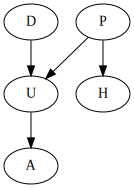

In [1]:
from graphviz import Digraph
dag = Digraph()
dag.edge('P', 'U')
dag.edge('P', 'H')
dag.edge('U', 'A')
dag.edge('D', 'U')
dag

$$
\begin{equation}
\begin{aligned}
P(P=1 \mid H=1, A=1)
&= \sum_u \sum_d P(P=1, U=u, D=d \mid H=1, A=1) \\
&= \sum_u \sum_d \frac{P(H=1, A=1 \mid P=1, U=u, D=d) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} \\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1, U=u, D=d) \cdot P(A=1 \mid P=1, U=u, D=d) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} & \text{Once we know the parents of $H$ and $A$, they are independent from each other.}\\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} & \text{Once we know the parents of $H$ and $A$, they are independent of the d-separated from the other vars.}\\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=1, D=d) \cdot P(P=1) \cdot P(D=d)}{P(H=1, A=1)} \\
&=\frac{ \sum_u \sum_d P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=1, D=d) \cdot P(P=1) \cdot P(D=d)}{\sum_p \sum_u \sum_d P(H=1 \mid P=p) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=p, D=d) \cdot P(P=p) \cdot P(D=d)} \\
&=\frac{ P(P=1) \cdot P(H=1 \mid P=1) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d)}{ \sum_p P(P=p) \cdot P(H=1 \mid P=p) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=p, D=d) \cdot P(D=d)} \\
\end{aligned}
\end{equation}
$$

Numerator:
$$
\begin{equation}
\begin{aligned}
 P(P=1) \cdot P(H=1 \mid P=1) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d)
 &= 0.2 \cdot 0.9 \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d) \\
 &= 0.2 \cdot 0.9 \cdot  \\
 &\qquad [P(A=1 \mid U=0) \cdot (P(U=0 \mid P=1, D=0) \cdot P(D=0)  \\
 &\qquad + P(U=0 \mid P=1, D=1) \cdot P(D=1))  \\
 &\qquad + P(A=1 \mid U=1) \cdot (P(U=1 \mid P=1, D=0) \cdot P(D=0)  \\
 &\qquad + P(U=1 \mid P=1, D=1) \cdot P(D=1))] \\
&= 0.2 \cdot 0.9 \cdot 0.5 \cdot (0.1 \cdot 0.6 + 0.001 \cdot 0.4) + 0.95 \cdot (0.9 \cdot 0.6 + 0.999 \cdot 0.4) \\
&\approx 0.898056
\end{aligned}
\end{equation}
$$

Denominator:
$$
\begin{equation}
\begin{aligned}
 \sum_p P(P=p) \cdot P(H=1 \mid P=p) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=p, D=d) \cdot P(D=d)
&= 0.898056 + P(P=0) \cdot P(H=1 \mid P=0) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=0, D=d) \cdot P(D=d)  \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot P(A=1 \mid U=0) \cdot \sum_d P(U=0 \mid P=0, D=d) \cdot P(D=d) \\
&\qquad + P(A=1 \mid U=1) \cdot \sum_d P(U=1 \mid P=0, D=d) \cdot P(D=d) \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot P(A=1 \mid U=0) \cdot [P(U=0 \mid P=0, D=0) \cdot P(D=0) + P(U=0 \mid P=0, D=1) \cdot P(D=1)] \\
&\qquad + P(A=1 \mid U=1) \cdot [P(U=1 \mid P=0, D=0) \cdot P(D=0) + P(U=1 \mid P=0, D=1) \cdot P(D=1)] \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot 0.5 \cdot (0.99 \cdot 0.6 + 0.1 \cdot 0.4) + 0.95 \cdot (0.01 \cdot 0.6 + 0.9 \cdot 0.4) \\
&= 2.194532
\end{aligned}
\end{equation}
$$

Thus, $P(P=1 \mid H=1, A=1) = \frac{0.898056}{2.194532} \approx 41\%.$ 





In [3]:
numerator = 0.2*0.9*0.5*(0.1*0.6+0.001*0.4)+0.95*(0.9*0.6+0.999*0.4)

In [4]:
numerator

0.898056

In [5]:
denominator = numerator + 0.898056 + 0.8 * 0.2 * 0.5 * (0.99 * 0.6 + 0.1 * 0.4) + 0.95 * (0.01 * 0.6 + 0.9 * 0.4)

In [6]:
denominator

2.194532

In [7]:
numerator / denominator

0.40922438132595007

## Ex 2

Consider the distribution $p(a,b,c) = p(c \mid a,b) \cdot p(a) \cot p(b)$. 

### Part I

Is $a \perp b \mid \emptyset$?

#### Ans

$$
\begin{equation}
\begin{aligned}
p(a,b,c) &= p(c \mid a,b) \cdot p(a) \cdot p(b) \\
p(a,b,c) \cdot \frac{p(a,b)}{p(a,b,c)} &= p(c \mid a,b) \cdot \frac{p(a,b)}{p(a,b,c)} \cdot p(a) \cdot p(b) \\
p(a,b) &= p(a) \cdot p(b)
\end{aligned}
\end{equation}
$$

Therefore, $a \perp b \mid \emptyset$.


### Part II
Is $a \perp b \mid c$?

#### Ans

Not in general. Consider the case $A \rightarrow C \leftarrow B$. $C$ is a collider. Conditioning on $C$ and $A$ could tell us something about $B$.

## Ex 3

The Chest Clinic network[185] concerns the diagnosis of lung disease (tuberculosis, lung cancer, or both, or neither), see fig(3.15). In this model a visit to Asia is assumed to increase the probability of tuberculosis. State if the following conditional independence relationships are true or false

### Part I

1. $\text{tuberculosis} \perp \text{smoking} \mid \text{shortness of breath}$

#### Ans

False. $t \rightarrow e \rightarrow d \leftarrow b \leftarrow s$ is open after conditioning on $d$.

In [8]:
proba_d = 0.1 * (1-0.064828) * 0.7 * 0.5 + \
0.7 * (0.064828) * 0.7 * 0.5 + \
0.8 * (1-0.064828) * 0.3 * 0.5 + \
0.9 * (0.064828) * 0.3 * 0.5 + \
0.1 * (1-0.064828) * 0.4 * 0.5 + \
0.7 * (0.064828) * 0.4 * 0.5 + \
0.8 * (1-0.064828) * 0.6 * 0.5 + \
0.9 * (0.064828) * 0.6 * 0.5


In [9]:
proba_d

0.43931049999999994

In [10]:
proba_d_given_s_is_1 = 0.1 * 0.4 * ((1-0.0104) * 0.9) + 0 * 0.1 + \
0.7 * 0.4 * ((0.0104) * 0.9) + 1 * 0.1 + \
0.8 * 0.6 * ((1-0.0104) * 0.9) + 0 * 0.1 + \
0.9 * 0.6 * ((0.0104) * 0.9) + 1 * 0.1 


In [11]:
proba_d_given_s_is_1

0.6708080000000001

In [12]:
proba_d_given_s_is_0 = 0.1 * 0.7 * ((1-0.0104) * 0.99) + \
    0.7*0.7 * 0.0104*0.99 + \
    0.8 * 0.3 * (1-0.0104) * 0.99 + \
    0.9 * 0.3 * 0.0104 * 0.99
proba_d_given_s_is_0

0.3115332

## Ex 6

In [16]:
num = 0.99 * ((0.98 * 0.02) + (0.03 * 0.98)) * 0.05 + \
    0.92 * ((0.02 * 0.02) + (0.97 * 0.98)) * 0.05

denom = num + \
    1 * ((0.98 * 0.02) + 0.03 * 0.98) * 0.95 \
    + 0.01 * ((0.02 * 0.02) + 0.97 * 0.98) * 0.95

proba_f_empty_given_s_no = num / denom
proba_f_empty_given_s_no

0.4537471991823578

## Ex 8



### Part I

In [17]:
num = 0.5 * 0.01 *0.01 + \
    0.7 * 0.99 * 0.01

denom = num + 0.5 * 0.95 * 0.99 + \
    0.9 * 0.05 * 0.99

proba_b_tr_given_w_tr = num / denom
proba_b_tr_given_w_tr

0.013377285445973396

### Part II

In [19]:
num = 0.8 * 0.5 * 0.01 * 0.01 \
    + 0.3 *0.9 *0.99 + 0.01

denom = num + 0.8 * 0.5 * 0.95 * 0.99 \
    + 0.3 * 0.9 * 0.05 * 0.99

proba_b_tr_given_w_tr_g_tr = num / denom
proba_b_tr_given_w_tr_g_tr

0.41586132957467714

## Ex 3.14

There are three computers indexed by $i ∈ {1,2,3}$. Computer $i$ can send a message in one timestep to computer $j$ if $C_{ij} = 1$, otherwise $C_{ij} = 0$. There is a fault in the network and the task is to find out some information about the communication matrix C (C is not necessarily symmetric). To do this, Thomas, the engineer, will run some tests that reveal whether or not computer $i$ can send a message to computer $j$ in $t$ timesteps, $t ∈ \{1,2\}$. This is expressed as $C_{ij}(t)$, with $C_{ij}(1) ≡ C_{ij}$. For example, he might know that $C_{13}(2) = 1$, meaning that according to his test, a message sent from computer 1 will arrive at computer 3 in at most 2 timesteps. Note that this message could go via different routes – it might go directly from 1 to 3 in one timestep, or indirectly from 1 to 2 and then from 2 to 3, or both. You may assume $C_{ii} = 1$. A priori Thomas thinks there is a 10% probability that $C_{ij} = 1, i \neq j$, and assumes that each such connection is independent of the rest. Given the test information $C = \{C_{12}(2) = 1, C_{23}(2) = 0\}$, compute the a posteriori probability vector:

$\qquad [p(C_{12} = 1 \mid C), p(C_{13} = 1 \mid C), p(C_{23} = 1 \mid C), p(C_{32} = 1 \mid C), p(C_{21} = 1 \mid C), p(C_{31} = 1 \mid C)]$

### Ans

The given information can be represented as adjacency matrices. The following adjacency matrix has a 1 when a computer $i$ can reach another computer $j$ in 1 timestep:

$$
\begin{bmatrix}
    1 & ? & ? \\
    ? & 1 & ? \\
    ? & ? & 1
\end{bmatrix}
$$

We fill the diagonal with 1s because it was given that $C_{ij} = 1$ for $i = j$. The rest are filled with question marks to represent uncertainty.

We are also given the information that $C = \{C_{12}(2) = 1, C_{23}(2) = 0\}$. We could represent this as follows:

$$
\begin{bmatrix}
    ? & > 0 & ? \\
    ? & ? & 0 \\
    ? & ? & ?
\end{bmatrix}
$$

$C_{12}(2) = 1$ is represented as $> 0$ having at least one path from computer 1 to computer 2 satisfies the statement $C_{12}(2) = 1$. 

We can run a simulation where we stochastically generate values for the question marks in the first matrix according to the assumption that each computer being able to reach other computers in one timestep has a 10% probability. We then square that matrix and then filter for what we know, namely that row 1, col 2 has value greater than 0, and that row 2, column 3 has has value 0. Once we've collected enough of those, we could calculate estimates for the posterior distributions of interest.

In [4]:
import numpy as np

In [6]:
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
three_d = np.array([arr, arr])
three_d

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [16]:
three_d[:,1,2]

array([6, 6])

In [12]:
np.where(np.array([arr, arr]) == 3)

(array([0, 1]), array([0, 0]), array([2, 2]))

In [14]:
np.where(np.array([arr, arr]) > 3)

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [8]:
arr.dot(arr)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [18]:
def simulate_3_14(num_sim=10_000):
    possible_timestep_1_square_matrices = []
    
    for i in range(num_sim):
        timestep_1_square_matrix = np.array([
            [1, np.random.binomial(n=1, p=0.1), np.random.binomial(n=1, p=0.1)],
            [np.random.binomial(n=1, p=0.1), 1, np.random.binomial(n=1, p=0.1)],
            [np.random.binomial(n=1, p=0.1), np.random.binomial(n=1, p=0.1), 1],
        ])
        
        timestep_2_square_matrix = timestep_1_square_matrix.dot(timestep_1_square_matrix)
        
        if timestep_2_square_matrix[0,1] > 0 and timestep_2_square_matrix[1,2] == 0:
            possible_timestep_1_square_matrices.append(timestep_1_square_matrix)
            
    return np.array(possible_timestep_1_square_matrices)

In [19]:
poss_timestep_1_square_matrices = simulate_3_14()

In [21]:
len(poss_timestep_1_square_matrices)

928

$p(C_{12} = 1 \mid C) \approx 0.91$

In [22]:
poss_timestep_1_square_matrices[:,0,1].sum() / len(poss_timestep_1_square_matrices)

0.9116379310344828

$p(C_{12} = 1 \mid C) \approx 0.91$

$p(C_{13} = 1 \mid C) \approx 0.16$

In [23]:
poss_timestep_1_square_matrices[:,0,2].sum() / len(poss_timestep_1_square_matrices)

0.16379310344827586

$p(C_{23} = 1 \mid C) \approx 0$

In [24]:
poss_timestep_1_square_matrices[:,1,2].sum() / len(poss_timestep_1_square_matrices)

0.0

$p(C_{32} = 1 \mid C) \approx 0.19$

In [25]:
poss_timestep_1_square_matrices[:,2,1].sum() / len(poss_timestep_1_square_matrices)

0.1853448275862069

$p(C_{21} = 1 \mid C) \approx 0.08$

In [26]:
poss_timestep_1_square_matrices[:,1,0].sum() / len(poss_timestep_1_square_matrices)

0.07974137931034483

$p(C_{31} = 1 \mid C) \approx 0.11$

In [27]:
poss_timestep_1_square_matrices[:,2,0].sum() / len(poss_timestep_1_square_matrices)

0.11206896551724138

## Ex 3.15

A belief network models the relation between the variables `oil`, `inf`, `eh`, `bp`, `rt` which stand for the price of oil, inflation rate, economy health, British Petroleum Stock price, retailer stock price. Each variable takes the states low, high, except for bp which has states low, high, normal. The belief network model for these variables has tables

| --------------------------------------------------------- | --------------------------------------------------------- |
| - | - |
| $p(eh=low) = 0.2$| |
|$p(\text{bp}=low \mid oil = low) = 0.9$ | $ p(\text{bp} = normal \mid oil = low) = 0.1 $|
|$p(\text{bp}=low \mid oil = high) = 0.1$ | $(\text{bp} = normal \mid oil = high) = 0.4 $|
|$p(\text{oil}=low \mid eh = low) = 0.9 $|$ p(\text{oil}=low \mid eh = high) = 0.05 $|
|$p(\text{rt}=low \mid inf = low, eh = low) = 0.9 $|$ p(\text{rt}=low \mid inf = low, eh = high) = 0.1 $|
|$p(\text{rt}=low \mid inf = high, eh = low) = 0.1 $|$ p(\text{rt}=low \mid inf = high, eh = high) = 0.01 $|
|$p(\text{inf}=low \mid oil = low, eh = low) = 0.9 $|$ p(\text{inf}=low \mid oil = low, eh = high) = 0.1 $|
|$p(\text{inf}=low \mid oil = high, eh = low) = 0.1 $|$ p(\text{inf}=low \mid oil = high, eh = high) = 0.01 $|


### Part I

Draw a belief network for this distribution.

#### Ans

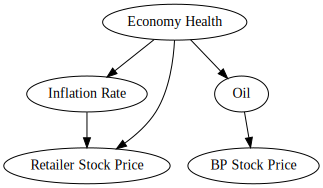

In [3]:
from graphviz import Digraph
dag = Digraph()
dag.edge('Economy Health', 'Inflation Rate')
dag.edge('Economy Health', 'Oil')
dag.edge('Economy Health', 'Retailer Stock Price')
dag.edge('Oil', 'BP Stock Price')
dag.edge('Inflation Rate', 'Retailer Stock Price')
dag


### Part II

Given that the BP stock price is normal and the retailer stock price is high, what is the probability that inflation is high?

#### Ans

In [2]:
num = 0.1 * 0.05 * 0.2 * (1-0.9) * (1-0.1) \
    + 0.1 * 0.05 * (1-0.02) * (1-0.1) * (1-0.01) \
    + (1-0.01) * (1-0.9) * 0.2 * (1-0.1) * (1-0.1) \
    + (1-0.1) * (1-0.05) * (1-0.2) * (1-0.01) * (1-0.01)

denom = num + 0.1 * 0.05 * 0.2 * 0.9 + (1-0.9) \
    + 0.1 * 0.05 * (1-0.2) * 0.1 * (1-0.1) \
    + (1-0.1) * (1-0.9) * 0.2 * 0.1 * (1-0.9) \
    + (1-0.1) * (1-0.05) * (1-0.2) * 0.01 * (1-0.1)

num / denom

0.8652486861571567

When the BP stock price is normal, and the retailer stock price is high, that, there's an $86.5\%$ chance that inflation is high. 